In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

| Nombre            | Descripción                                        |
|-------------------|----------------------------------------------------|
| ATM_ID            | Identificador único del cajero automático          |
| Date              | Fecha en la que se realizó la operación            |
| Denomination      | Valor de los billetes dispensados o cargados       |
| Initial_Balance   | Cantidad de dinero disponible en el cajero al inicio de la jornada |
| Final_Balance     | Cantidad de dinero disponible en el cajero al final de la jornada  |
| Cash_Out          | Cantidad de dinero retirado del cajero durante la jornada |
| Cash_In           | Cantidad de dinero añadido al cajero durante la jornada |


In [2]:
# Specify the path to the CSV file
csv_file = "/content/simulated_atm_data.csv"

# Read the CSV file into a DataFrame
transactions = pd.read_csv(csv_file)

# Display the DataFrame
transactions

,ATM_ID,Date,Denomination,Initial_Balance,Final_Balance,Cash_Out,Cash_In
0,1,2023-02-20,50,2190877,4267911,467187,2544221.0
1,1,2023-02-20,500,3660052,4750587,536972,1627507.0
2,1,2023-02-20,100,3188698,6573806,183115,3568223.0
3,1,2023-02-21,50,1224174,933103,291071,0.0
4,1,2023-02-21,500,928960,538801,390159,0.0
...,...,...,...,...,...,...,...
812502,26,2023-06-04,20,1816785,1599234,217551,0.0
812503,26,2023-06-04,200,1955068,1650940,304128,0.0
812504,26,2023-06-05,100,4302641,5353560,600700,1651619.0
812505,26,2023-06-05,1000,2834501,5890200,559228,3614927.0


In [3]:
# Asegúrate de que la columna 'Date' sea de tipo datetime
transactions['Date'] = pd.to_datetime(transactions['Date'])

# Crear una nueva columna 'Month' extrayendo el mes de la columna 'Date'
transactions['Month'] = transactions['Date'].dt.month


In [4]:
unique_months = transactions['Month'].unique()
for month in unique_months:
    globals()[f"transaction_{month}"] = transactions[transactions['Month'] == month]

In [5]:
copy_transactions = transactions.copy()
m1_transaction_2 = transaction_2.copy()
m1_transaction_3 = transaction_3.copy()
m1_transaction_4 = transaction_4.copy()
m1_transaction_5 = transaction_5.copy()
m1_transaction_6 = transaction_6.copy()
m1_transaction_7 = transaction_7.copy()


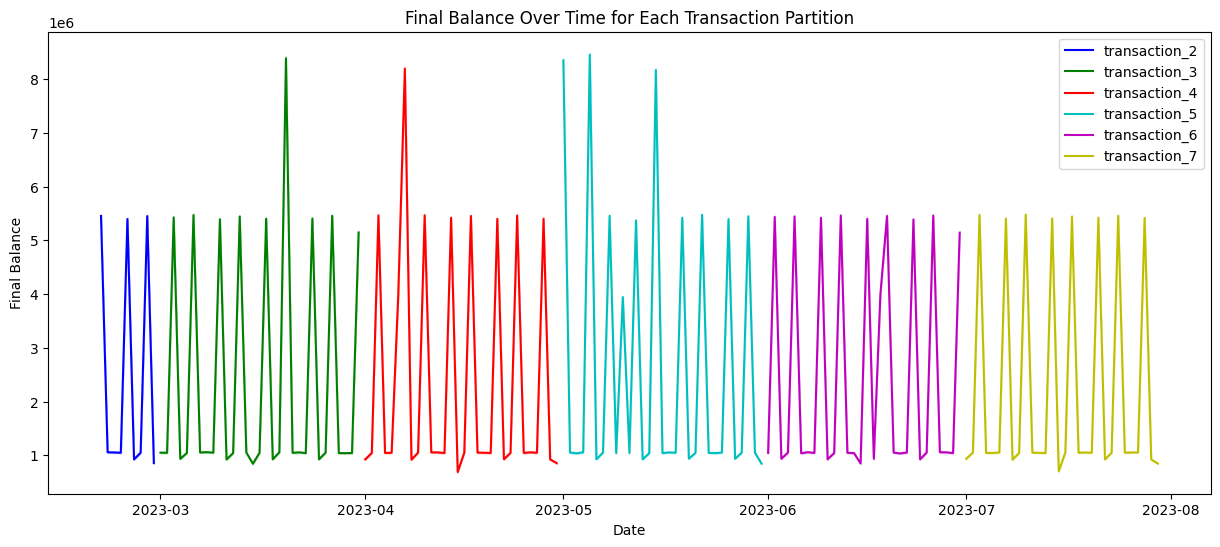

In [6]:
# Crear una figura y un objeto de ejes
plt.figure(figsize=(15, 6))

# Lista de DataFrames
dfs = [transaction_2, transaction_3, transaction_4, transaction_5, transaction_6, transaction_7]

# Lista de colores para cada línea
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Trazar una línea para cada DataFrame
for i, df in enumerate(dfs):
    sns.lineplot(x='Date', y='Final_Balance', data=df, color=colors[i], label=f'transaction_{i+2}')

# Añadir leyenda
plt.legend()
plt.title('Final Balance Over Time for Each Transaction Partition')
plt.xlabel('Date')
plt.ylabel('Final Balance')

# Mostrar el gráfico
plt.show()

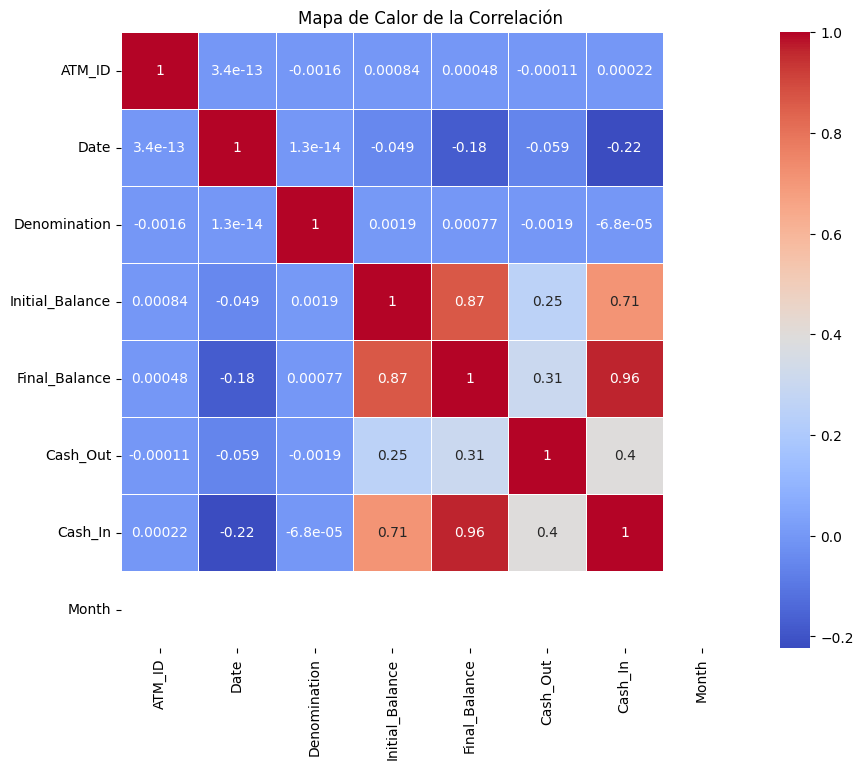

In [7]:
# Calcula la matriz de correlación
correlation_matrix = transaction_5.corr()
# Crea el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de la Correlación')
plt.show()


*  Observamos que las variables 'Final_Balance' y 'Cash_In' tienen mucha correlación y esto es logico ya que los días de Pagos dotados en el banco va a haber una cantidad superior en Final Balance.
*  Tanto 'Final_Balance' como 'Initial_Balance' tienen mucha correlación porque dependendiendo el mes va por ejemplo Mayo, hay más operaciones en los cajeros por los días festivos como el 1 de mayo dia del trabajo, el 10 de mayo, etc

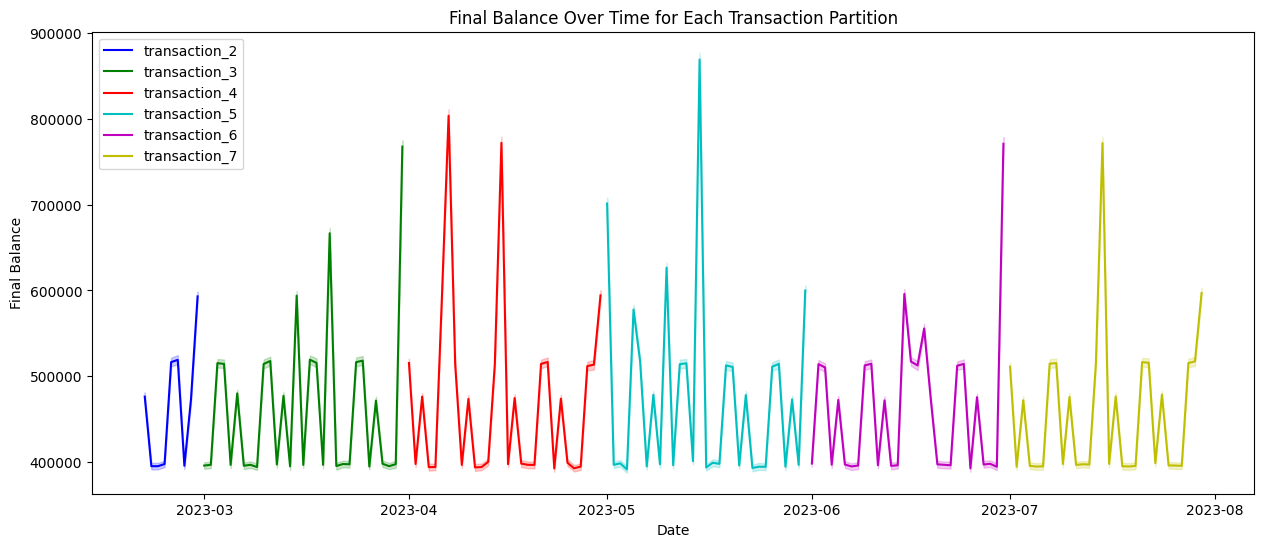

In [8]:
# Crear una figura y un objeto de ejes
plt.figure(figsize=(15, 6))

# Lista de DataFrames
dfs = [transaction_2, transaction_3, transaction_4, transaction_5, transaction_6, transaction_7]

# Lista de colores para cada línea
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Trazar una línea para cada DataFrame
for i, df in enumerate(dfs):
    sns.lineplot(x='Date', y='Cash_Out', data=df, color=colors[i], label=f'transaction_{i+2}')

# Añadir leyenda
plt.legend()
plt.title('Final Balance Over Time for Each Transaction Partition')
plt.xlabel('Date')
plt.ylabel('Final Balance')

# Mostrar el gráfico
plt.show()

Interpretación de la Gráfica (con meses y Cash_Out como retiros de dinero)
Variabilidad Mensual:

Cada color en la gráfica representa un mes diferente, desde marzo de 2023 hasta julio de 2023.
La gráfica muestra cómo las salidas de dinero (retiros) varían a lo largo del tiempo dentro de cada mes.
Picos de Retiros:

Los picos más altos en la gráfica indican días en los que se realizaron retiros de dinero significativos.
Observamos que cada mes tiene varios días con picos notables, lo que podría indicar eventos recurrentes o patrones específicos de comportamiento de los clientes.
Observaciones Detalladas
Marzo (azul):

Los retiros comienzan de forma moderada y se incrementan hacia el final del mes.
Hay un pico significativo a mediados de marzo.
Abril (verde):

Observamos mayor variabilidad con varios picos altos distribuidos a lo largo del mes.
Hay días con retiros considerablemente altos, especialmente a mediados de abril.
Mayo (rojo):

Presenta picos pronunciados a lo largo del mes.
Notamos un incremento en los retiros hacia el final del mes.
Junio (cian):

Junio tiene picos más altos en comparación con los meses anteriores.
Hay un aumento significativo en los retiros a mediados y finales de junio.
Julio (morado):

Julio muestra varios picos altos, indicando una alta demanda de retiros en diferentes momentos del mes.
La variabilidad en julio es alta, con varios días de retiros elevados.
Agosto (amarillo):

Aunque los datos son limitados para agosto, podemos observar un incremento en los retiros hacia principios del mes.
Recomendaciones Basadas en la Observación
Planificación de Efectivo:

Ajustar la cantidad de efectivo disponible en los cajeros automáticos antes de los días con picos altos identificados en cada mes.
Esto ayudará a asegurar que los cajeros tengan suficiente efectivo durante los días de alta demanda.
Análisis de Patrones:

Identificar si los picos corresponden a eventos recurrentes como días de pago, festividades o fines de semana largos.
Utilizar esta información para prever los retiros en meses futuros.
Monitoreo y Ajuste Continuo:

Implementar un sistema de monitoreo continuo para ajustar dinámicamente la cantidad de efectivo en los cajeros en base a la demanda actual y esperada.
Analizar las tendencias mensuales para mejorar la precisión en la gestión de efectivo.
Segmentación de Clientes:

Considerar segmentar a los clientes según su comportamiento de retiro para entender mejor sus necesidades y patrones de uso.
Esto permitirá una planificación más precisa y personalizada para diferentes grupos de usuarios.
Conclusión
La gráfica proporciona una visión clara de cómo varían los retiros de dinero en los cajeros automáticos mes a mes. Esta información es crucial para la planificación efectiva de la gestión de efectivo, asegurando que los cajeros automáticos puedan satisfacer la demanda de los clientes en los días y periodos clave.

Ciclos Semanales: Hay una repetición clara en los valores de Cash_Out que sugiere un patrón semanal. Los picos más altos tienden a ocurrir aproximadamente cada siete días, lo que puede indicar que ciertos días de la semana tienen una mayor demanda de efectivo.

Días de Mayor Demanda: Se observa que alrededor del 13 de julio hay un pico significativamente más alto que los demás. Esto podría coincidir con un evento especial, como el pago de salarios, bonificaciones, o alguna festividad que incremente la demanda de efectivo.

Variabilidad de Demanda: A lo largo del mes, hay una considerable variabilidad en los montos de Cash_Out. Los valores fluctúan entre aproximadamente 200,000 y 1,200,000 unidades, lo que indica una demanda de efectivo bastante dinámica.

Tendencias en la Demanda: Los picos intermedios a lo largo de la semana muestran que hay días específicos con una demanda superior al promedio, mientras que otros días tienen valores más bajos. Esto puede ayudar a planificar mejor la cantidad de efectivo que se necesita en los cajeros automáticos para ciertos días de la semana.

In [15]:
transactions.describe()

,ATM_ID,Date,Denomination,Initial_Balance,Final_Balance,Cash_Out,Cash_In,Month
count,812507.000000,812507,812507.000000,8.125070e+05,8.125070e+05,8.125070e+05,8.125060e+05,812507.000000
mean,50.223901,2023-05-10 23:39:17.445782016,338.738669,1.966032e+06,2.414628e+06,4.659017e+05,9.142381e+05,4.819407
min,1.000000,2023-02-20 00:00:00,20.000000,7.500000e+05,0.000000e+00,4.230000e+02,0.000000e+00,2.000000
25%,25.000000,2023-04-01 00:00:00,50.000000,1.237419e+06,8.143125e+05,3.106980e+05,0.000000e+00,4.000000
50%,50.000000,2023-05-11 00:00:00,200.000000,1.723164e+06,1.315926e+06,4.514560e+05,0.000000e+00,5.000000
75%,76.000000,2023-06-20 00:00:00,500.000000,2.479734e+06,4.342792e+06,5.914960e+05,1.822941e+06,6.000000
max,100.000000,2023-07-30 00:00:00,1000.000000,4.837693e+06,1.293635e+07,1.409726e+06,8.836228e+06,7.000000
std,29.217768,NaN,361.319695,9.543316e+05,2.302215e+06,1.944633e+05,1.553952e+06,1.535783


In [16]:
copy_transactions

,ATM_ID,Date,Denomination,Initial_Balance,Final_Balance,Cash_Out,Cash_In,Month
0,1,2023-02-20,50,2190877,4267911,467187,2544221.0,2
1,1,2023-02-20,500,3660052,4750587,536972,1627507.0,2
2,1,2023-02-20,100,3188698,6573806,183115,3568223.0,2
3,1,2023-02-21,50,1224174,933103,291071,0.0,2
4,1,2023-02-21,500,928960,538801,390159,0.0,2
...,...,...,...,...,...,...,...,...
812502,26,2023-06-04,20,1816785,1599234,217551,0.0,6
812503,26,2023-06-04,200,1955068,1650940,304128,0.0,6
812504,26,2023-06-05,100,4302641,5353560,600700,1651619.0,6
812505,26,2023-06-05,1000,2834501,5890200,559228,3614927.0,6


In [17]:
copy_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812507 entries, 0 to 812506
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ATM_ID           812507 non-null  int64         
 1   Date             812507 non-null  datetime64[ns]
 2   Denomination     812507 non-null  int64         
 3   Initial_Balance  812507 non-null  int64         
 4   Final_Balance    812507 non-null  int64         
 5   Cash_Out         812507 non-null  int64         
 6   Cash_In          812506 non-null  float64       
 7   Month            812507 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(5)
memory usage: 46.5 MB


In [18]:
from sklearn.preprocessing import MinMaxScaler

# Rellenar NaNs en 'Cash_In' con 0
copy_transactions['Cash_In'].fillna(0, inplace=True)

# Normalizar los datos
scaler = MinMaxScaler()
copy_transactions[['Initial_Balance', 'Final_Balance', 'Denomination', 'Cash_In']] = scaler.fit_transform(
    copy_transactions[['Initial_Balance', 'Final_Balance', 'Denomination', 'Cash_In']])

# Transformar la fecha en características numéricas
copy_transactions['Day'] = copy_transactions['Date'].dt.day
copy_transactions['Month'] = copy_transactions['Date'].dt.month
copy_transactions['Weekday'] = copy_transactions['Date'].dt.weekday

# Seleccionar características y target
X = copy_transactions[['Initial_Balance', 'Final_Balance', 'Denomination', 'Cash_In', 'Day', 'Month', 'Weekday']]
y = copy_transactions['Cash_Out']


In [19]:
from keras.models import Sequential
from keras.layers import Dense

# Definir el modelo
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))  # Una sola salida para la predicción del "Cash_Out"

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')


In [20]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
20313/20313 [==============================] - 48s 2ms/step - loss: 33462130688.0000
Epoch 2/10
20313/20313 [==============================] - 37s 2ms/step - loss: 32794613760.0000
Epoch 3/10
20313/20313 [==============================] - 38s 2ms/step - loss: 31991066624.0000
Epoch 4/10
20313/20313 [==============================] - 38s 2ms/step - loss: 30857512960.0000
Epoch 5/10
20313/20313 [==============================] - 37s 2ms/step - loss: 28934492160.0000
Epoch 6/10
20313/20313 [==============================] - 36s 2ms/step - loss: 24693460992.0000
Epoch 7/10
20313/20313 [==============================] - 37s 2ms/step - loss: 10433230848.0000
Epoch 8/10
20313/20313 [==============================] - 39s 2ms/step - loss: 64776332.0000
Epoch 9/10
20313/20313 [==============================] - 37s 2ms/step - loss: 58371688.0000
Epoch 10/10
20313/20313 [==============================] - 37s 2ms/step - loss: 58206408.0000


In [23]:
# Evaluar el modelo
loss = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")

5079/5079 [==============================] - 8s 2ms/step - loss: 45017044.0000
Loss: 45017044.0


In [24]:
# Obtener predicciones
predicciones = model.predict(X_test).flatten()

# Mostrar ejemplo de predicciones y valores reales
for i in range(10):
    print(f"Predicción: {predicciones[i]}, Valor Real: {y_test.iloc[i]}")

5079/5079 [==============================] - 8s 1ms/step
Predicción: 485898.75, Valor Real: 485661
Predicción: 347180.25, Valor Real: 347480
Predicción: 483374.78125, Valor Real: 483281
Predicción: 600851.8125, Valor Real: 599963
Predicción: 398672.4375, Valor Real: 398928
Predicción: 379778.4375, Valor Real: 379840
Predicción: 520915.625, Valor Real: 520600
Predicción: 832583.125, Valor Real: 831673
Predicción: 515377.78125, Valor Real: 514898
Predicción: 755682.6875, Valor Real: 754562


In [31]:
import pandas as pd

# Supongamos que 'predicciones' y 'y_test' ya están definidos
# Crear un DataFrame con las predicciones y los valores reales
resultados = pd.DataFrame({
    'Predicción': predicciones[:10],
    'Valor Real': y_test.iloc[:10].values
})

# Mostrar el DataFrame
resultados


,Predicción,Valor Real
0,485898.75000,485661
1,347180.25000,347480
2,483374.78125,483281
3,600851.81250,599963
4,398672.43750,398928
5,379778.43750,379840
6,520915.62500,520600
7,832583.12500,831673
8,515377.78125,514898
9,755682.68750,754562


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calcular MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, predicciones)
print(f"MAE: {mae}")

# Calcular MSE (Mean Squared Error)
mse = mean_squared_error(y_test, predicciones)
print(f"MSE: {mse}")

# Calcular RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")


MAE: 754.4805316819178
MSE: 45017063.176266365
RMSE: 6709.475626028189


In [26]:
# Calcular la media de los datos
mean_value = np.mean(copy_transactions['Cash_Out'])

# Evaluar la relación del MAE con la media y el rango
print(f"Media de los datos: {mean_value}")
print(f"MAE: {mae}")
print(f"Porcentaje del MAE respecto a la media: {(mae / mean_value) * 100:.2f}%")
print(f"Porcentaje del MAE respecto al máximo: {(mae / np.max(copy_transactions['Cash_Out'])) * 100:.2f}%")

Media de los datos: 465901.70948681055
MAE: 754.4805316819178
Porcentaje del MAE respecto a la media: 0.16%
Porcentaje del MAE respecto al máximo: 0.05%


Porcentaje del MAE respecto a la Media: El MAE representa aproximadamente el 0.16% de la media de los valores reales de "Cash_Out". Este porcentaje es muy bajo, lo cual indica que, en promedio, las predicciones del modelo están muy cerca de los valores reales. Esto sugiere una buena capacidad del modelo para capturar la tendencia general de los datos.

Porcentaje del MAE respecto al Máximo: El MAE es también muy bajo en comparación con el valor máximo de "Cash_Out". Esto significa que el modelo no solo está bien ajustado en términos de la media, sino que también maneja bien los casos extremos o los valores más altos de la distribución de "Cash_Out".

Razones por las cuales este MAE puede considerarse bueno:
Precision Relativa: El MAE de 754.48 indica que, en promedio, las predicciones del modelo se desvían en esa cantidad de unidades respecto a los valores reales de "Cash_Out". Dado que este error es relativamente bajo en comparación con la escala de los datos (media y máximo), el modelo está proporcionando predicciones bastante precisas.

Contexto de Aplicación: Para aplicaciones como la gestión de efectivo en cajeros automáticos, donde optimizar la cantidad de efectivo necesario puede significar reducción de costos y mejor servicio al cliente, un MAE bajo como este es deseable. Esto significa que las decisiones basadas en las predicciones del modelo probablemente sean más precisas y eficientes.

In [27]:
# Cálculo de porcentajes
porcentaje_rmse_media = (rmse / mean_value ) * 100
porcentaje_rmse_maximo = (rmse / np.max(copy_transactions['Cash_Out'])) * 100

print(f"RMSE: {rmse:.2f}")
print(f"Porcentaje del RMSE respecto a la media: {porcentaje_rmse_media:.2f}%")
print(f"Porcentaje del RMSE respecto al máximo: {porcentaje_rmse_maximo:.2f}%")

RMSE: 6709.48
Porcentaje del RMSE respecto a la media: 1.44%
Porcentaje del RMSE respecto al máximo: 0.48%


Interpretación de los Porcentajes del RMSE
Porcentaje del RMSE respecto a la Media: El 1.44% indica que, en promedio, el RMSE es el 1.44% de la media de los valores reales de "Cash_Out". Este valor es relativamente bajo, lo cual sugiere que el modelo está haciendo predicciones bastante precisas en relación con la escala de los datos.

Porcentaje del RMSE respecto al Máximo: El 0.48% indica que el RMSE es el 0.48% del valor máximo de "Cash_Out". Esto muestra que el modelo también maneja bien los valores extremos o los casos más altos de la distribución de "Cash_Out".

Evaluación General
Basado en estos porcentajes, podemos decir que:

El RMSE de 6709.48 unidades por sí mismo indica un nivel absoluto de error en las predicciones.
Los porcentajes del RMSE en relación con la media y el máximo sugieren que el modelo está proporcionando predicciones precisas y que el error promedio es relativamente bajo en comparación con la variabilidad y la escala de los datos.
En resumen, los porcentajes del RMSE indican que el modelo está realizando predicciones adecuadamente precisas en términos relativos a la distribución y variabilidad de los valores reales de "Cash_Out". Esto es favorable en términos de evaluación de la precisión del modelo para tu aplicación específica.